## DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

# Purpose for DBSCAN
- Clustering points in dense regions
- Detecting points(outliers / noise) in sparse regions


# Key Concepts of DBSCAN
- ε (epsilon) - Radius:
Defines the neighborhood radius for a point. Points within this radius are considered neighbors.


- minPts (Minimum Number Of Points): The minimum number of neighbors required for a point to be considered a core point
  

# Types of Points
- Core Point: has at least minPts neighbors within  ε.
- Border Point: Has fewer than minPts neighbors , but is within the ε of a core point.
- Noise (Outlier): Not a core point, not a border point - it's isolated 

# How Does DBSCAN Work ?
1. All points start as unvisited
2. Pick any unvisited core
3. Count how many points are within ε:
   - if number of neighbors > minPts : Start a new cluster
   - if not : Mark as noise
4. Expand the cluster by visiting all neighbors recursively
5. Repeat until all points are processed     

# When to use DBSCAN ?
- Advantages:
   - No need to specify the number of clusters.
   - Can detect outliers(noise).
   - Works well for irregular shaped clusters (non - spherical).
- Disadvantages:
   - Choosing ther right ε and minPts is tricky.
   - Performance can degrade in high-dimensional datasets.

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate Sample Data

In [10]:
x , _ = make_moons(n_samples=300 , noise=0.05 , random_state=0)

# Create the DBSCAN model

In [14]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
y_pred = dbscan.fit_predict(x)

# Plot The Results

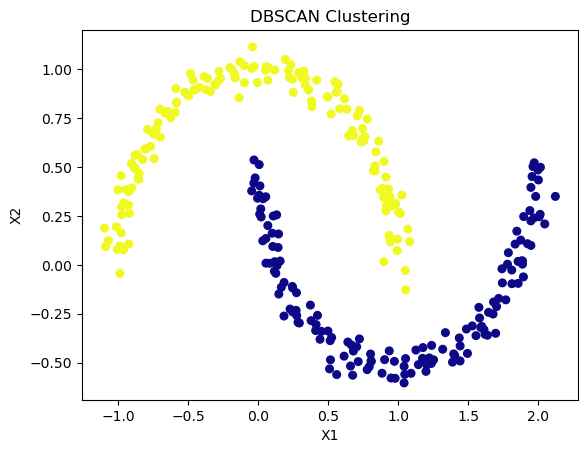

In [18]:
plt.scatter(x[:,0],x[:,1], c = y_pred , cmap='plasma', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Extracting Outliers

In [21]:
noise_points = x[y_pred == -1]
print("Number of noise points:", len(noise_points))

Number of noise points: 0


# Choosing Epsilon (ε) - What If It's Hard ?

#   Choosing Epsilon (ε) — What if It's Hard?

In high-dimensional or complex datasets, choosing an appropriate `eps` value becomes very challenging. A poor choice can:

- Merge all data into one single cluster (over-clustering),
- Or classify every point as noise (under-clustering).

##  Solution: k-distance Graph

A widely used method is the **k-distance graph**:

- For each point, compute the distance to its *k-th* nearest neighbor.
- Sort all distances in ascending order and plot them.
- The **"elbow" point** (where the curve sharply rises) is a good candidate for `eps`.

This technique is especially useful in datasets where data density is not uniform.


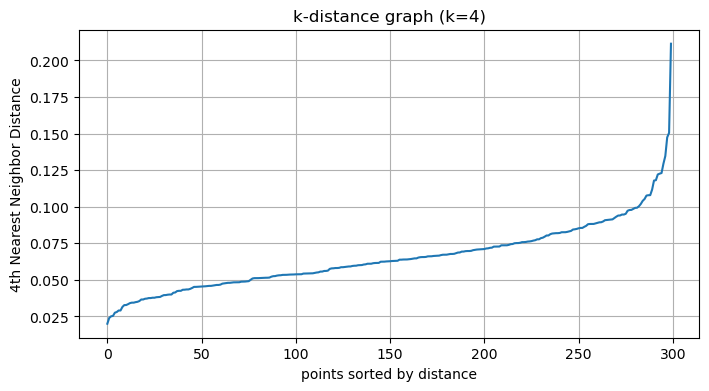

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np 
import matplotlib.pyplot as plt 

k = 4 # generally min_samples - 1
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(x)
distances , indices = nbrs.kneighbors(x)

distances = np.sort(distances[:, k - 1])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance graph (k=4)")
plt.xlabel("points sorted by distance")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.grid()
plt.show()

#  Identifying Noise Points

In DBSCAN, all points labeled `-1` are classified as **noise or outliers**. These are data points that do not belong to any dense region.

## How to find them:
- After calling `fit_predict`, simply filter the array using label `-1`.
- You can analyze the number of outliers or visualize them separately.

Noise points often represent:
- Anomalies,
- Errors in data collection,
- Or rare cases worth deeper investigation.


Number of noise points: 0


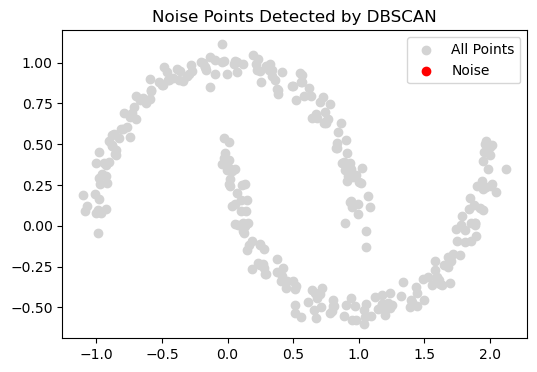

In [28]:
# Extract noise points
noise_points = x[y_pred == -1]

print("Number of noise points:", len(noise_points))

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(x[:, 0], x[:, 1], c='lightgray', label="All Points")
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', label="Noise")
plt.legend()
plt.title("Noise Points Detected by DBSCAN")
plt.show()


#   Cluster Summary — Count Clusters and Points

After clustering, it's useful to:
- Count how many clusters were found,
- See the number of points in each cluster (including noise).

This helps in:
- Evaluating clustering performance,
- Understanding data distribution,
- Detecting if clusters are imbalanced.

Using a summary table (e.g., via `pandas`) gives a clear overview.


In [31]:
import pandas as pd 
from collections import Counter

cluster_counts = Counter(y_pred)
df_clusters = pd.DataFrame.from_dict(cluster_counts, orient='index', columns=['Number of Points'])
df_clusters.index.name = "Cluster Label"
df_clusters.sort_index()

,Number of Points
Cluster Label,
0,150
1,150


#  Experimenting with eps and min_samples

Clustering quality is heavily affected by the choice of:
- `eps`: the neighborhood radius,
- `min_samples`: the minimum number of points to form a dense region.

## Tip:
Perform a **grid experiment** where different combinations of these parameters are tested. Visualize the output to understand:
- Cluster fragmentation,
- Outlier detection rate,
- Stability of clusters.

This hands-on tuning helps build an intuition for parameter selection.


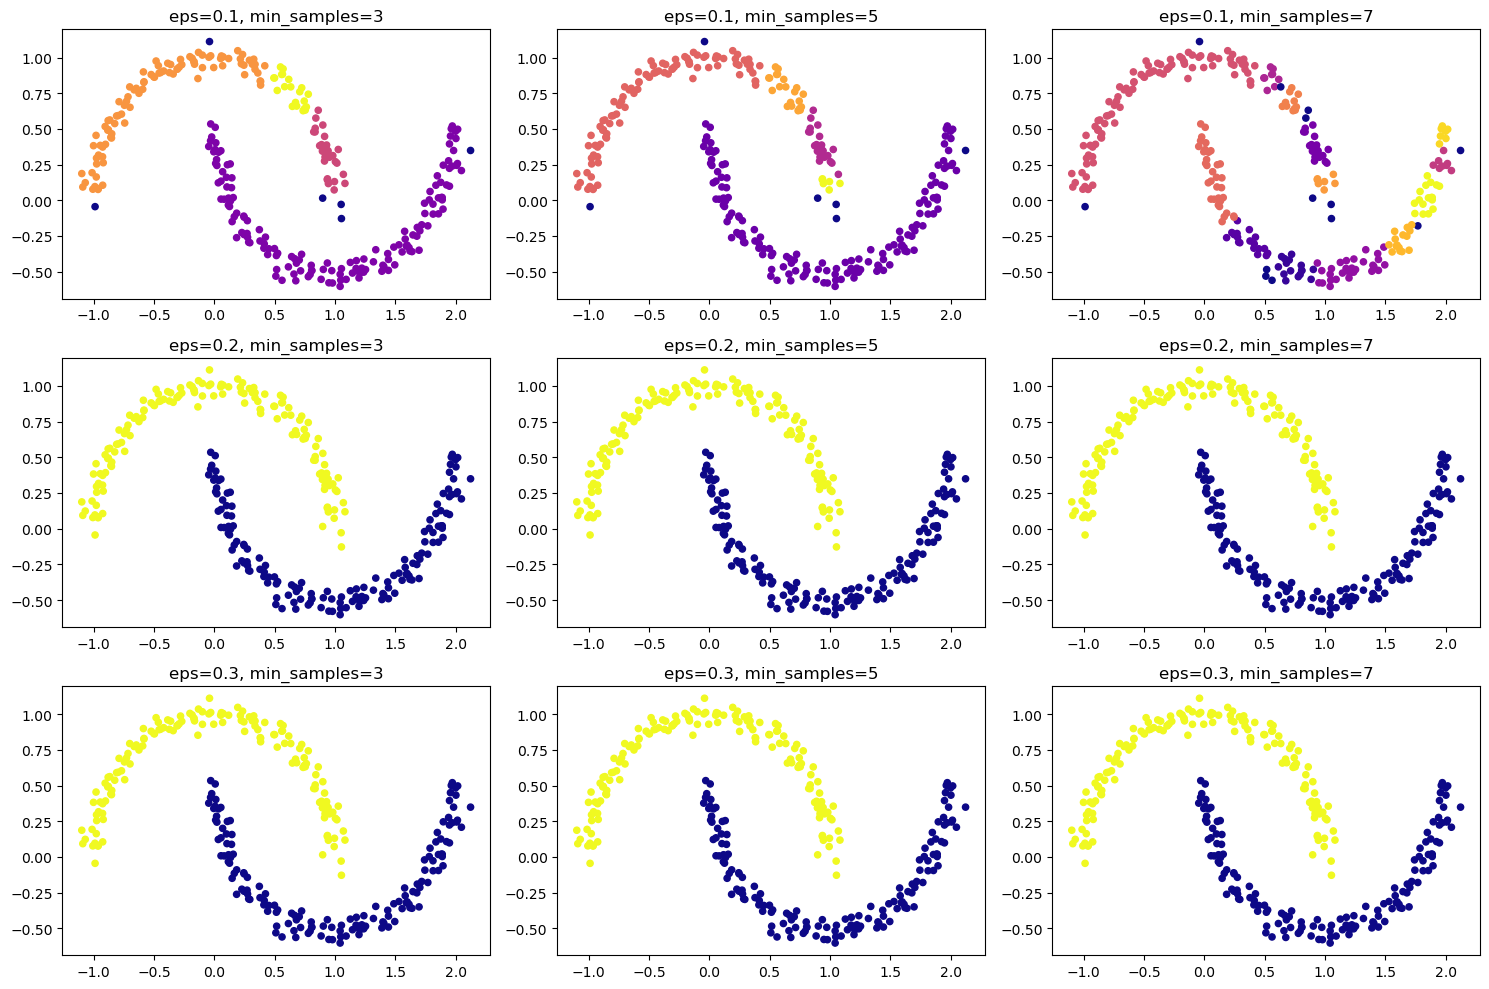

In [34]:
from sklearn.cluster import DBSCAN

eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(x)
        
        ax = axes[i, j]
        ax.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma', s=20)
        ax.set_title(f"eps={eps}, min_samples={min_samples}")
plt.tight_layout()
plt.show()


#  DBSCAN in High-Dimensional Data

In high-dimensional spaces:
- Distance metrics become less meaningful (curse of dimensionality),
- Most data points appear to be equally distant,
- As a result, `eps` loses its discriminative power.

## Recommended Solution:
Apply **dimensionality reduction** before DBSCAN:
- **PCA (Principal Component Analysis)** for linear projection,
- **t-SNE** or **UMAP** for nonlinear projection.

Then, perform DBSCAN on the reduced 2D or 3D data. This improves performance and interpretability.


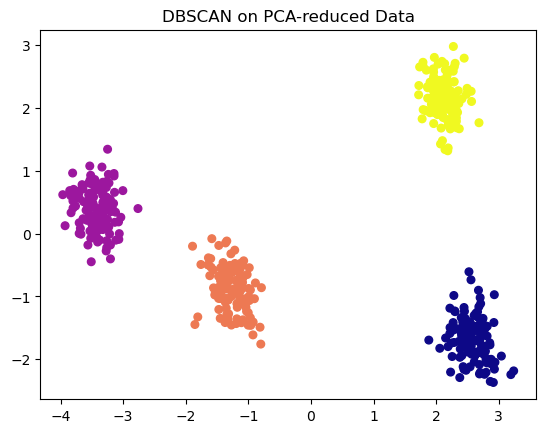

In [49]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


x_high_dim, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, n_features=10, random_state=42)
x_high_dim = StandardScaler().fit_transform(x_high_dim)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_high_dim)

model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(x_pca)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='plasma', s=30)
plt.title("DBSCAN on PCA-reduced Data")
plt.show()


#  DBSCAN for Anomaly Detection

DBSCAN is commonly used for **unsupervised anomaly detection**.

Why?
- Noise points (label `-1`) are points that don’t belong to any dense group.
- In many real-world cases, anomalies are exactly such isolated points.

## Use cases:
- Detecting network intrusions,
- Identifying fraud,
- Monitoring sensor faults in IoT systems.

You can flag noise points as potential anomalies for further analysis or alerts.


In [40]:
anomalies = x[y_pred == -1]
print("Anomaly count:", len(anomalies))


Anomaly count: 0


# Extra: HDBSCAN – A Better DBSCAN?

**HDBSCAN (Hierarchical DBSCAN)** improves on DBSCAN by:

- Automatically determining the optimal `eps`,
- Handling variable density clusters,
- Being more robust to noise,
- Providing cluster stability scores.

It is particularly useful when:
- You have non-uniform density data,
- You want better outlier detection,
- Or you want to avoid manually tuning parameters.




In [82]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 621.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/mahmutesat/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/mahmutesat/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


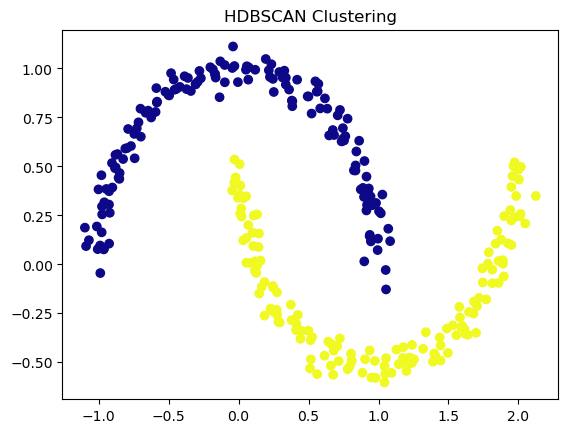

In [47]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma')
plt.title("HDBSCAN Clustering")
plt.show()


---

##  Contact

Thank you for reading this notebook on **DBSCAN - Advanced Concepts**.  
If you'd like to connect, collaborate, or ask any questions, feel free to reach out through the following platforms:

-  **Researcher**: Mahmut Esat KOLAY - Candidate Computer Engineer 
-  [LinkedIn](https://www.linkedin.com/in/mahmutesatkolay)  
-  [GitHub](https://github.com/MEK-0)  
-  **Email**: esat.kolay19@gmail.com

---

*This notebook is part of my learning journey in Machine Learning and Unsupervised Clustering. Stay tuned for more updates and projects!*

